In [210]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [211]:
#Hàm thiết kế thuật toán K-Means
def kmeans(img_1d, k_clusters, max_iter, init_centroids):
    # Bước 1: Khởi tạo centroids ban đầu
    if init_centroids == 'random':
        centroids = np.random.randint(0, 256, size=(k_clusters, img_1d.shape[1]))
    elif init_centroids == 'in_pixels':
        unique_pixels = np.unique(img_1d, axis=0) #Thực ra không cần dòng này vì đã set replace = FALSE
        random_indices = np.random.choice(unique_pixels.shape[0], size=k_clusters, replace=False)
        centroids = unique_pixels[random_indices]
    else:
        raise ValueError("Invalid value for init_centroids")

    # Bước 2: Chạy vòng lặp cho tới khi đạt được điểm hội tụ(tức là sẽ có 2 điểm centroid gần giống nhau) hoặc đạt max_iter
    for i in range(max_iter):
        # Bước 3: Gán nhãn cho từng pixel
        dist = np.linalg.norm(img_1d[:, np.newaxis] - centroids, axis=2)
        labels = np.argmin(dist, axis=1)
        if init_centroids == 'random':
        # Step 4: Cập nhật centroids mới
            new_centroids = np.zeros_like(centroids)
            for j in range(k_clusters):
                if np.sum(labels == j) > 0:
                    new_centroids[j] = np.mean(img_1d[labels == j], axis=0)
                else:
                    new_centroids[j] = [0, 0, 0]
        elif init_centroids == 'in_pixels':
            new_centroids = np.array([np.mean(img_1d[labels == j], axis=0) for j in range(k_clusters)])
        
        try:
            # Kiểm tra điểm hội tụ
            if np.allclose(centroids, new_centroids,atol=0.2):
                break
        except:
            if np.allclose(centroids, new_centroids[:,None],atol=0.2):
                break

        centroids = new_centroids

    return centroids, labels


In [212]:
# Hàm giảm số lượng màu của ảnh
def reduce_color(image_path, k_clusters, max_iter, init_centroids):
    # Load ảnh
    image = Image.open(image_path)

    # Chuyển ảnh sang dạng array
    image_array = np.array(image)

    # Reshape kích thước ảnh
    height, width, num_channels = image_array.shape
    image_1d = np.reshape(image_array, (height * width, num_channels))

    # Áp dụng thuật toán K-Means để bắt đầu giảm số lượng màu
    centroids, labels = kmeans(image_1d, k_clusters, max_iter, init_centroids)

    # Ánh xạ từng pixel tới tâm cụm(centroid) gần nhất của nó
    reduced_image_1d = centroids[labels]

    # Reshape ảnh đã giảm số lượng màu
    reduced_image_array = np.reshape(
        reduced_image_1d, (height, width, num_channels))

    # Chuyển ảnh dạng array thành dạng ảnh 
    reduced_image = Image.fromarray(reduced_image_array.astype(np.uint8))

    return reduced_image

In [213]:
# Hàm lưu ảnh
def save_image(img, name):
    valid_extensions = ['.pdf', '.png', '.jpg']
    file_extension = name[name.rfind('.'):].lower()

    if file_extension in valid_extensions:
        img.save(name)
    else:
        name = name[:name.rfind('.')] + '.png'
        img.save(name)

In [265]:
#Hàm main
def main():
    # Người dùng nhập tên file ảnh để tớ xử lý
    image_path = input("Enter the image file name: ")

    # Người dùng nhập tên số cluster để tớ xử lý
    k_clusters = int(input("Enter the number of clusters: "))

    # Người dùng nhập max_iter để tớ xử lý
    max_iter = int(input("Enter the maximum number of iterations: "))

    # Người dùng nhập loại để mà khởi tạo để tớ xử lý
    init_method = input(
        "Choose the initialization method ('random' or 'in_pixels'): ")

    # Người dùng nhập tên file ảnh để tớ lưu (có thể nhập tên hoặc nhập cả tên + định dạng)
    save_name = input("Enter the name to save the image: ")

    # Giảm màu tại đây ạ thưa cả nhà iu của kem
    reduced_image = reduce_color(image_path, k_clusters, max_iter, init_method)

    # Xuất cái ảnh gốc với ảnh đã giảm màu tại đây thưa quý zị
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))

    axs[0].imshow(Image.open(image_path))
    axs[0].set_title("Original Image")
    axs[0].axis("off")

    axs[1].imshow(reduced_image)
    axs[1].set_title("Reduced Image ({} clusters)".format(k_clusters))
    axs[1].axis("off")

    plt.tight_layout()
    plt.show()

    # Lưu ảnh
    save_image(reduced_image, save_name)


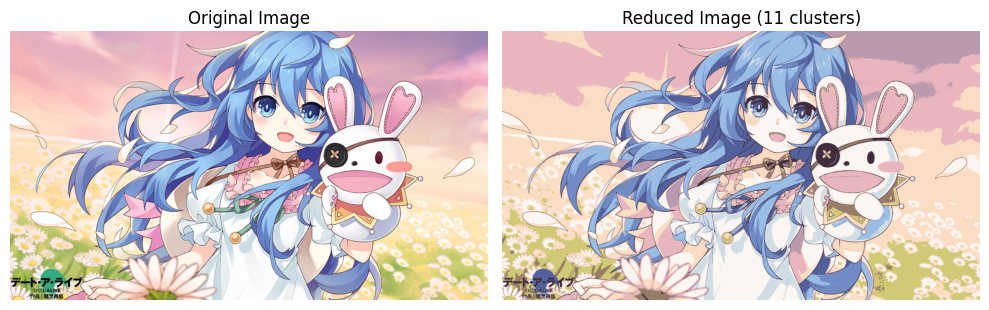

In [282]:
# Chạy hàm main
if __name__ == "__main__":                                              
    main()